# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

In [2]:
# Read your api key environment variable
#api_key = os.getenv("1ab3a96ea0a0446f9145db53241c2c19")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key="1ab3a96ea0a0446f9145db53241c2c19")

In [4]:
# Fetch the Bitcoin news articles
all_bitcoin = newsapi.get_everything(q='bitcoin')
all_bitcoin

{'status': 'ok',
 'totalResults': 7105,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
   'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
   'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
   'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
   'publishedAt': '2020-12-03T22:00:00Z',
   'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it wor

In [5]:
# Fetch the Ethereum news articles
all_Ethereum = newsapi.get_everything(q='Ethereum')
all_Ethereum

{'status': 'ok',
 'totalResults': 1736,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
   'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
   'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
   'publishedAt': '2020-11-23T14:16:00Z',
   'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - R

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in all_bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.0,0.838
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.0,0.826
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.0,0.928
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.0,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.0,1.000


In [7]:
# Create the ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in all_Ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
3,2020-12-16,FILE PHOTO: A representation of virtual curren...,0.0000,0.000,0.0,1.000
4,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.0,1.000


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.238942,0.070053,0.009368,0.920579
std,0.357613,0.079392,0.028447,0.083627
min,-0.585900,0.000000,0.000000,0.773000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.202300,0.050000,0.000000,0.950000
75%,0.532650,0.157000,0.000000,1.000000
max,0.801600,0.209000,0.103000,1.000000


In [9]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.115355,0.044750,0.009800,0.94545
std,0.251391,0.077683,0.043827,0.09877
min,-0.340000,0.000000,0.000000,0.67200
25%,0.000000,0.000000,0.000000,0.93500
50%,0.000000,0.000000,0.000000,1.00000
75%,0.195925,0.065000,0.000000,1.00000
max,0.877900,0.318000,0.196000,1.00000


In [ ]:
### Questions:

Q: Which coin had the highest mean positive score? 

A:  Bitcoin has the higher mean positive score
    Ethereum mean pos score= 0.044750
    Bitcoin mean pos score = 0.070053

Q: Which coin had the highest compound score?

A:  Ethereum has the higher compound score
    Ethereum compound score= 0.877900
    Bitcoin compound score= 0.801600

Q. Which coin had the highest positive score?

A:  Ethereum has the higher positive score
    Ethereum compound score= 0.318000
    Bitcoin compound score = 0.209000

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub(' ', text)
    words_punc_cleaned = word_tokenize(re_clean)
    # Create a list of the words
    words_lowercased = []
    # Convert the words to lowercase
    for word in words_punc_cleaned:
         words_lowercased.append(word.lower())
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_addon = {'rather', 'blockfi', 'applying'}
    words_stop_removed = [word for word in words_lowercased if word not in sw.union(sw_addon)]
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in words_stop_removed]
    return tokens

In [12]:
# append all words for each article to the word_tokenized list
bitcoin_word_tokenized = []
for text in bitcoin_df['text']:
    bitcoin_word_tokenized.append(tokenizer(text))


In [13]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens']  = bitcoin_word_tokenized
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.0,0.838,"[visa, partnered, cryptocurrency, startup, off..."
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.0,0.826,"[reaching, previous, time, high, november, th,..."
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.0,0.928,"[almost, three, year, day, since, price, bitco..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.0,0.950,"[november, absolutely, massive, two, month, ra..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.0,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [14]:
# Create a new tokens column for ethereum
Ethereum_word_tokenized = []
for text in Ethereum_df['text']:
    Ethereum_word_tokenized.append(tokenizer(text))

In [15]:
Ethereum_df['tokens']  = Ethereum_word_tokenized
Ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
3,2020-12-16,FILE PHOTO: A representation of virtual curren...,0.0000,0.000,0.0,1.000,"[file, photo, representation, virtual, currenc..."
4,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.0,1.000,"[file, photo, representation, virtual, currenc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams
lemmatizer = WordNetLemmatizer()

In [17]:
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [18]:
# Generate the Bitcoin N-grams where N=2 
bitcoin_text=''
for article in all_bitcoin["articles"]:
    if article['content']: 
        bitcoin_text += article['content']

In [19]:
processed_bitcoin = process_text(bitcoin_text)

In [20]:
def bigram_counter(text): 
    processed = process_text(bitcoin_text)
    bigrams = ngrams(processed, n=2)
    top_20 = dict(Counter(bigrams).most_common(20))
    return pd.DataFrame(list(top_20.items()), columns=['bigram', 'count'])

In [21]:
bigram_counter(processed_bitcoin)

,bigram,count
0,"(file, photo)",6
1,"(illustration, taken)",4
2,"(reuters, dado)",4
3,"(dado, ruvic)",4
4,"(char, reuters)",3
5,"(reuters, staff)",3
6,"(staff, file)",3
7,"(virtual, currency)",3
8,"(currency, bitcoin)",3
9,"(bitcoin, seen)",3


In [22]:
# Generate the Ethereum N-grams where N=2
Ethereum_text=''
for article in all_Ethereum["articles"]:
    if article['content']: 
        Ethereum_text += article['content']
processed_Ethereum = process_text(Ethereum_text)


In [23]:
def bigram_counter(text): 
    processed = process_text(Ethereum_text)
    bigrams = ngrams(processed, n=2)
    top_20 = dict(Counter(bigrams).most_common(20))
    return pd.DataFrame(list(top_20.items()), columns=['bigram', 'count'])
bigram_counter(processed_Ethereum)

,bigram,count
0,"(file, photo)",13
1,"(virtual, currency)",12
2,"(reuters, dado)",11
3,"(dado, ruvic)",11
4,"(ruvic, illustration)",11
5,"(currency, bitcoin)",9
6,"(illustration, taken)",9
7,"(london, reuters)",8
8,"(bitcoin, seen)",8
9,"(photo, representation)",7


In [24]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Get the top 10 words for Bitcoin
token_count(processed_bitcoin)

[('char', 19),
 ('bitcoin', 16),
 ('reuters', 9),
 ('ha', 8),
 ('illustration', 7),
 ('november', 6),
 ('file', 6),
 ('photo', 6),
 ('cryptocurrency', 5),
 ('year', 5)]

In [26]:
# Get the top 10 words for Ethereum
token_count(processed_Ethereum)

[('reuters', 29),
 ('illustration', 22),
 ('char', 20),
 ('bitcoin', 15),
 ('file', 13),
 ('photo', 13),
 ('currency', 13),
 ('virtual', 12),
 ('taken', 12),
 ('dado', 11)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [28]:
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

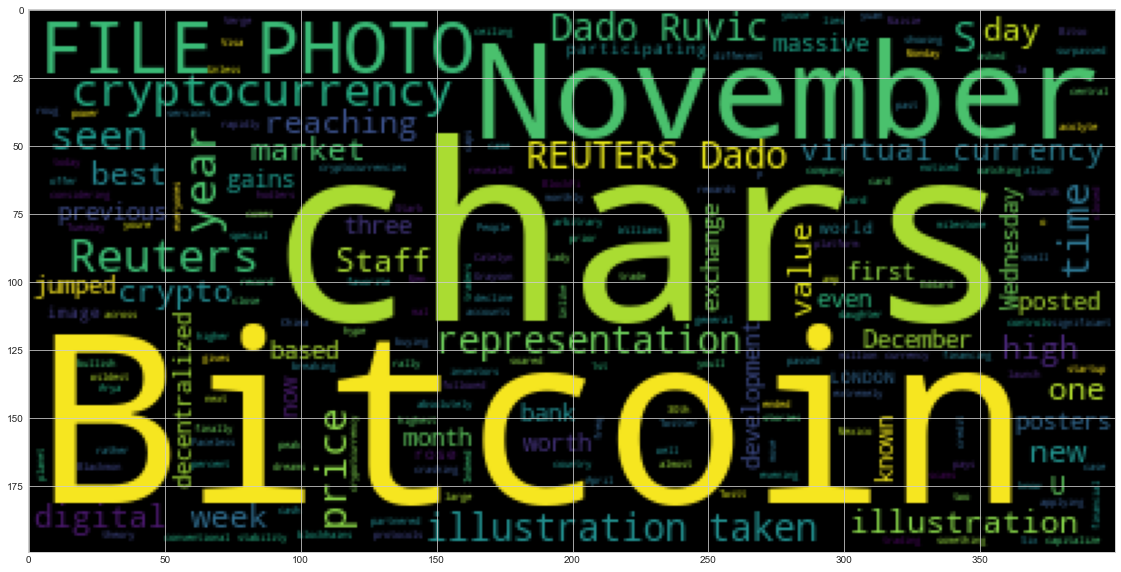

In [29]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

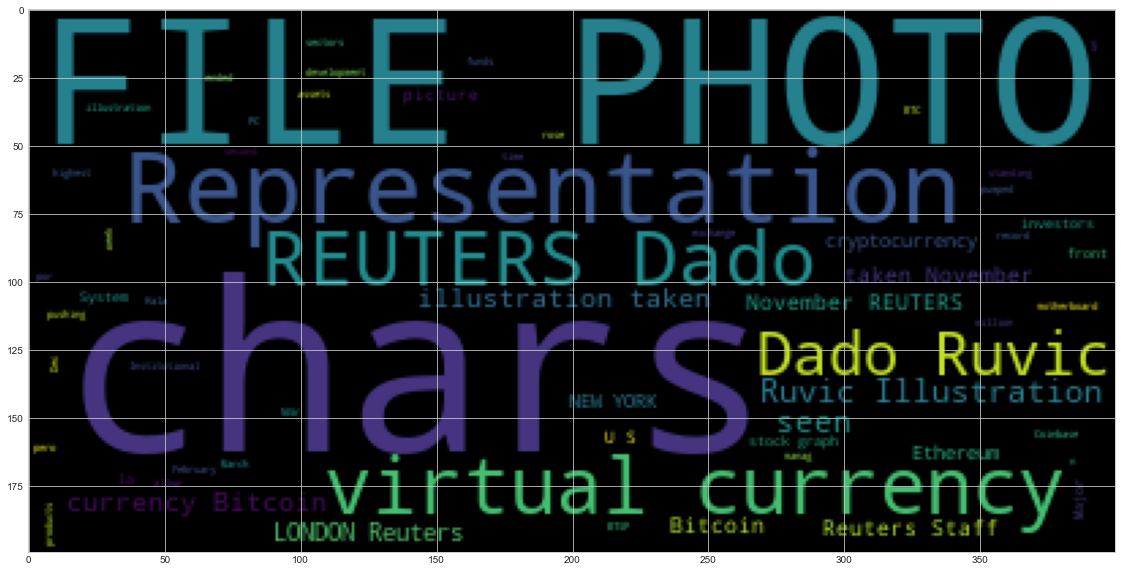

In [30]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(Ethereum_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [32]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [34]:
# Concatenate all of the bitcoin text together
bitcoin_text=''
for article in all_bitcoin["articles"]:
    if article['content']: 
        bitcoin_text += article['content']
        
bitcoin_text

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars]Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives th

In [ ]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

# Render the visualization
displacy.render(doc, style="ent")

In [ ]:
# Render the visualization
displacy.render(doc, style="ent")

In [ ]:
# List all Entities
for ent in doc.ents: 
    print(ent.text, ent.label_) 

---

## Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
Ethereum_text=''
for article in all_Ethereum["articles"]:
    if article['content']: 
        Ethereum_text += article['content']
processed_Ethereum = process_text(Ethereum_text)
Ethereum_text

In [ ]:
# Run the NER processor on all of the text
doc = nlp(Ethereum_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum'NER"

# Render the visualization
displacy.serve(doc, style="ent")

In [ ]:
# List all Entities
for ent in doc.ents: 
    print(ent.text, ent.label_)     